# Testing HotVis on the wiki paths

In [1]:
import csv
from HotVisFunctions import *
import pandas as pd
import numpy as np
import torch_geometric

In [2]:
#paths = pd.read_csv("graphs/Wikipedia/paths_finished.ngram")
#random_rows = paths.sample(n = 1000)
#random_rows.to_csv("graphs/Wikipedia/paths_finished_shortened.ngram", index=False)

In [3]:
def from_ngram(file: str, sep: str = ",") -> pp.PathData:
    with open(file, "r", encoding="utf-8") as f:
        paths = [line.strip().split(sep) for line in f if len(line.strip().split(sep)) > 1]
    
    weights = [1.0] * len(paths)

    mapping = pp.IndexMap()
    mapping.add_ids(np.concatenate([np.array(path) for path in paths]))

    pathdata = pp.PathData(mapping)
    pathdata.append_walks(node_seqs=paths, weights=weights)

    return pathdata

In [4]:
# load wiki
wiki = from_ngram("graphs/Wikipedia/paths_finished_shortened.ngram", sep=";")
print(wiki.get_walk(1))


('Heraclius', 'Islam', 'World_War_I', 'World_War_II', 'United_States', 'North_America', 'Canada', 'Canadian_Pacific_Railway', 'The_Canadian')


In [ ]:
print(wiki.mapping)

10th_century -> 0
11th_century -> 1
12th_century -> 2
13th_century -> 3
14th_century -> 4
15th_century -> 5
16th_century -> 6
17th_century -> 7
18th_century -> 8
19th_century -> 9
1_Ceres -> 10
1st_century -> 11
1st_century_BC -> 12
2004_Indian_Ocean_earthquake -> 13
2005_Atlantic_hurricane_season -> 14
2005_Sumatra_earthquake -> 15
20th_century -> 16
21st_century -> 17
4th_century -> 18
5th_century -> 19
6th_century -> 20
7th_century -> 21
8th_century -> 22
9th_century -> 23
< -> 24
AIDS -> 25
AK-47 -> 26
ASCII -> 27
A_Tale_of_a_Tub -> 28
A_cappella -> 29
Aardvark -> 30
Abbasid -> 31
Aberdeen -> 32
Abidjan -> 33
Abraham_Lincoln -> 34
Abu_Dhabi -> 35
Acceleration -> 36
Accra -> 37
Acetone -> 38
Achilles -> 39
Achilles_tendon -> 40
Acid_rain -> 41
Action_potential -> 42
Actor -> 43
Adam_Smith -> 44
Adelaide -> 45
Adenosine_triphosphate -> 46
Adolf_Hitler -> 47
Advertising -> 48
Afghanistan -> 49
Africa -> 50
African_Darter -> 51
African_Great_Lakes -> 52
African_Union -> 53
African_Wild

: 

In [ ]:
layout_2 = HotVis(wiki, 2, 5000, 3, alpha=[1, 0.5], force=10)
layout_3 =  HotVis(wiki, 3, 5000, 3, alpha=[1, 0.5, 0.3], force=10)
layout_5 =  HotVis(wiki, 5, 5000, 3, alpha=[1, 0.5, 0.3, 0.25, 0.2], force=10)

100%|██████████| 5000/5000 [04:53<00:00, 17.02it/s]


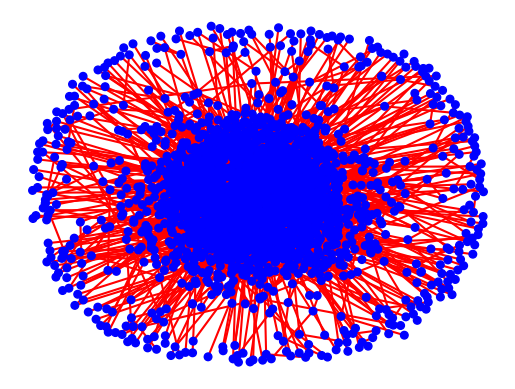

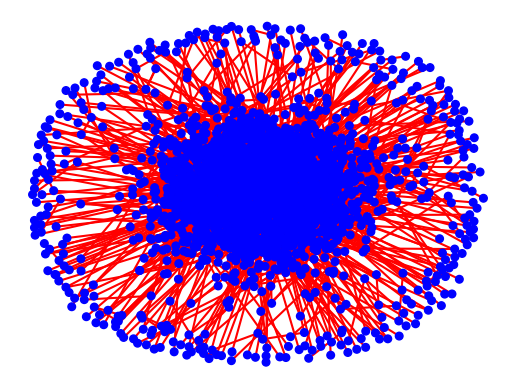

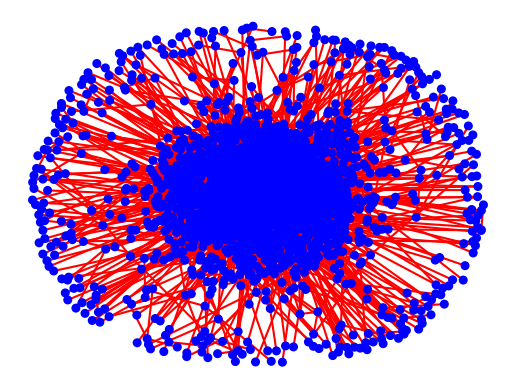

: 

In [ ]:
graph = pp.MultiOrderModel.from_PathData(wiki, max_order=1).layers[1]
pp.plot(graph, layout=layout_2, backend='matplotlib')
pp.plot(graph, layout=layout_3, backend='matplotlib')
pp.plot(graph, layout=layout_5, backend='matplotlib')

In [ ]:
#print(edge_crossing(wiki, layout_2))
#print(edge_crossing(wiki, layout_3))
#print(edge_crossing(wiki, layout_5))

In [ ]:
print(causal_path_dispersion(wiki, layout_2, 3))
print(causal_path_dispersion(wiki, layout_3, 3))
print(causal_path_dispersion(wiki, layout_5, 3))

tensor(3.3784, dtype=torch.float64)
tensor(3.2526, dtype=torch.float64)
tensor(3.1883, dtype=torch.float64)


In [ ]:
print(closeness_eccentricity(wiki, layout_2, 3, 0.1))
print(closeness_eccentricity(wiki, layout_3, 3, 0.1))
print(closeness_eccentricity(wiki, layout_5, 3, 0.1))

tensor(0.3932, dtype=torch.float64)
tensor(0.3892, dtype=torch.float64)
tensor(0.3827, dtype=torch.float64)
